## 1.) Вхідна Інформація:
05.02.25
1) Стержень:
   * Матеріал - АМг5П (ГОСТ 14838-78);
   * D=2.5мм - діаметр стержня.
   * $σ_в$ = 270МПа

3) Необходимая сила для среза стержня:
   $$τ=P/A$$
   $$A = pd^2/4 [mm^2]$$
   $$τ=σ_в*0.6 [MPa]$$ 
   $$r=D_0/2 [mm]$$ - плече
   $$M=P*r [Nmm]$$
   
____________________________________________________
   


**Розрахунок проводився за:**

1. "Справочник Анурьева Том 3, с 146."

2. https://help.autodesk.com/view/INVNTOR/2024/RUS/?guid=GUID-ABAD1D28-C07E-48F3-9CEC-16CE9D5D2A52

3. Биргер с 88


## Формулы, использованные при расчете пружины кручения:
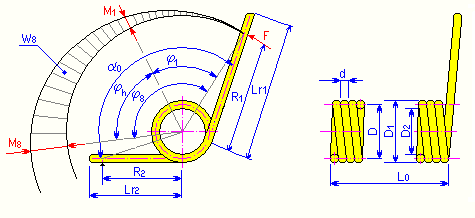

### 1. Определение момента среза стержня:

*   **Связь напряжения среза с пределом прочности при растяжении:**
    $$\tau_{ср} = 0.6 * \sigma_в$$

    где:
    *   $\sigma_в$ - предел прочности при растяжении (МПа).

*   **Наибольший рабочий крутящий момент (по Анурьеву):**

    $$M_{2}=\frac{\pi d^{3}}{32 K}\left[\sigma_{и з}\right]$$

    где:
    *   $M_2$ - наибольший рабочий момент (Н*мм);
    *   $K$ - коэффициент, учитывающий кривизну и форму сечения витка;
    *   $[\sigma_{из}]$ - допускаемое напряжение на изгиб (МПа).



*   **Индекс пружины:**

    $$c = \frac{D}{d}$$

    где:
    *   $c$ - индекс пружины.

*   **Коэффициент формы сечения и кривизны витка:**

    $$K = \frac{4c - 1}{4c - 4}$$

**Максимальная рабочая нагрузка**

Формулы для расчета максимального крутящего момента (M₈) и соответствующей ему силы (F₈):

$$M₈ = (π * Φ₈ * E * d⁴) / (3660 * (π * D * n + R₁ / 3 + R₂ / 3) * 1000)[Нм]$$ 

$$F₈ = (M₈ * 1000) / R₁ [Н]$$


**Где:**

*   **M₈**:  Крутящий момент для полностью нагруженной пружины [Нм].
*   **D**:  Средний диаметр пружины [мм].
*   **n**:  Количество активных витков [-].
*   **R₁**:  Плечо рабочего усилия [мм].
*   **R₂**:  Плечо реакции опоры [мм].
*   **E**:  Модуль упругости [МПа].
*   **d**:  Диаметр проволоки [мм].
*   **Φ₈**:  Угловое отклонение рабочего рычага для полностью нагруженной пружины [°].

### 3. Связь силы среза с крутящим моментом (для варианта с непосредственным воздействием пружины на стержень):

*   **Крутящий момент:**

    
    $$M = F_{ср} * R$$
    

    где:
    *   $M$ - крутящий момент (Н*мм или Н*м);
    *   $F_{ср}$ - сила среза (Н);
    *   $R$ - плечо силы (мм или м).
____________________________________________________
# Розрахунок:

In [184]:
import math

# Исходные данные:

# Стержень
D_sterjen = 2.5  # мм (диаметр стержня)
sigma_v_sterjen = 270  # МПа (предел прочности стержня Амг5П4П)
tau_t_sterjen = sigma_v_sterjen * 0.6  # МПа (предел текучести на сдвиг)

# Пружина
D_in = 20  # мм (внутренний диаметр)
fi_8 = 77  # град (максимальный угол закручивания)
E = 2.1e5  # МПа (модуль упругости, сталь 60С2А)
material_pruzh = '60С2А'  # Материал пружины
sigma_v_pruzh = 780  # МПа (предел прочности)
tau_dop = 0.6 * sigma_v_pruzh  # МПа (допускаемое напряжение на кручение)


# Заданные параметры пружины (подлежат изменению):
d = float(input('Введите диаметр проволоки пружины (мм): '))  # мм (диаметр проволоки)
n = float(input('Введите количество рабочих витков пружины: '))  # (количество рабочих витков)

# 1. Расчет M_min (минимального момента для среза стержня):
A_sterjen = math.pi * D_sterjen ** 2 / 4  # мм^2
P_srez = tau_t_sterjen * A_sterjen  # Н
r = (D_in + d) / 2  # мм, плечо силы
M_min = P_srez * r / 1000  # Н*м

# 2. Расчет параметров пружины:
D0 = D_in + d  # мм, Средний диаметр
c = D0 / d  # Индекс пружины
K = (4 * c - 1) / (4 * c - 4) + 0.615 / c  # Коэфф. кривизны
R1 = 25
R2 = 18

# 3. Расчет M8 (максимального момента) по формуле из изображения:
# Все размеры в мм, E в МПа, результат в Н*м


# 4. Расчет момента по упрощенной формуле Анурьева:
sigma_iz_dop_anurev = tau_dop * 1.25 # МПа
M_anurev_upr = (math.pi * d**3 * sigma_iz_dop_anurev) / (32 * K) / 1000
M1 = (math.pi * fi_1 * E * d**4) / (3660 * (math.pi * D0 * n + R1/3 + R2/3)) / 1000
M8 = (math.pi * fi_8 * E * d ** 4) / (3660 * (math.pi * D0 * n + R1 / 3 + R2 / 3)) / 1000
sigma = (32*M8*K)/(math.pi*d**3)

print(f'''
____________________________________________________
Параметры пружины:
Материал: {material_pruzh}
d = {d:.2f} мм - диаметр проволоки
Dвн = {D_in} мм - внутренний диаметр
D0 = {D0:.2f} мм - средний диаметр
n = {n:.2f} - количество рабочих витков
c = {c:.2f} - индекс пружины
K = {K:.2f} - коэффициент, учитывающий кривизну витка
fi_8 = {fi_8} град - максимальный угол закручивания
____________________________________________________
Результат:
M_min = {M_min:.3f} Н*м - минимально необходимый момент для среза
M8 = {M8:.3f} Н*м - максимальный момент пружины 
M_anurev_upr = {M_anurev_upr:.3f} Н*м - момент по Анурьеву
sigma = {sigma:.3f}MPa < {sigma_iz_dop_anurev:.3f}MPa
''')

Введите диаметр проволоки пружины (мм):  6
Введите количество рабочих витков пружины:  5



____________________________________________________
Параметры пружины:
Материал: 60С2А
d = 6.00 мм - диаметр проволоки
Dвн = 20 мм - внутренний диаметр
D0 = 26.00 мм - средний диаметр
n = 5.00 - количество рабочих витков
c = 4.33 - индекс пружины
K = 1.37 - коэффициент, учитывающий кривизну витка
fi_8 = 77 град - максимальный угол закручивания
____________________________________________________
Результат:
M_min = 10.338 Н*м - минимально необходимый момент для среза
M8 = 42.551 Н*м - максимальный момент пружины 
M_anurev_upr = 9.075 Н*м - момент по Анурьеву
sigma = 2.743MPa < 585.000MPa

